# A/B-тест

В отделе маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы и проанализировать результаты A/B-теста. 


## Оглавление:
* [Приоритизация гипотез](#first-bullet)
* [Анализ A/B-теста](#second-bullet)
* [Вывод](#sixth-bullet)

## Приоритизация гипотез<a name="first-bullet"></a>

In [100]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt

In [101]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [102]:
# Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета
data['ICE'] = (data['Impact'] * data['Confidence'] / data['Efforts']).round()
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


Наиболее перспективные гипотезы по ICE: 
* Запустить акцию, дающую скидку на товар в день рождения 
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 

В пятерку "лучших" также входят:
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

In [103]:
# Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']
data[['Hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending=False).style.highlight_max(axis=0)

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112,11
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56,7
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40,13
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40,8
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9,1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1


В целом первая пятерка перспективных гипотез не изменилась, но все они поменялись местами. На первом месте теперь оказалась гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", а "Запустить акцию, дающую скидку на товар в день рождения" - на пятом. Такие изменения произошли из-за показателя Reach, который у гипотезы "Запустить акцию, дающую скидку на товар в день рождения" всего 1, т.к. эти измения повлияют на очень ограниченный круг покупателей,  а у "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" он самый большой - 10, т.к. затронет всех. 

## Анализ A/B-теста <a name="second-bullet"></a>

In [104]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [105]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [106]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [107]:
visitors.duplicated().sum()

0

In [108]:
orders.duplicated().sum()

0

У нас есть две таблицы с результатми А/В-теста, которые содержат информацию о покупках и посещениях интернет-магазина в августе 2019г. Даты предварительно перевели в формат даты и проверили на наличие повторов.

In [109]:
#orders.groupby('visitorId')['group'].count()

##### Построим график кумулятивной выручки по группам. 

In [110]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [111]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups\
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [112]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups\
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [113]:
# объединим кумулятивные данные в одной таблице
cumulativeData = ordersAggregated\
    .merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


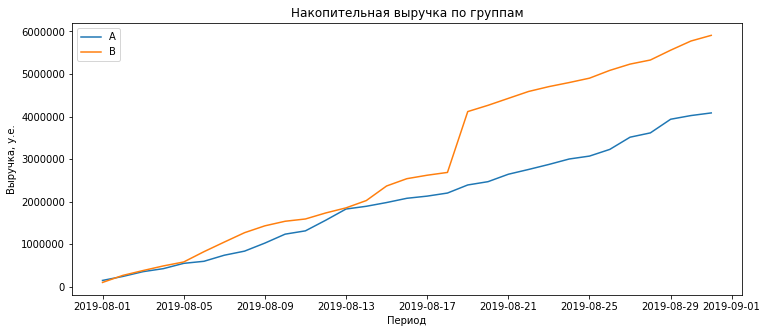

In [114]:
# таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим графики выручки групп А и В
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.title('Накопительная выручка по группам')
plt.ylabel('Выручка, у.е.')
plt.xlabel('Период')
plt.show()

Выручка в обоих группах равномерно увеличивается примерно до середины месяца. Затем график выручки группы (B) резко растет. Скорее всего в этот период в группе появились очень дорогие заказы, либо произошел всплеск числа заказов.

##### Построим график кумулятивного среднего чека по группам.

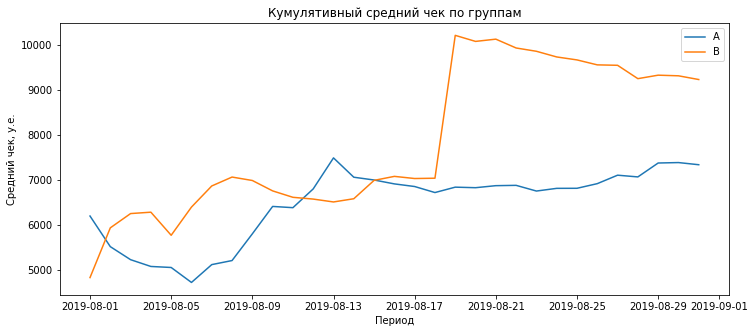

In [115]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средний чек, у.е.')
plt.xlabel('Период')
plt.show()

Очевидно, что в группу В попали крупные заказы, что скорее всего помешало среднему чеку группы В установиться на реальном значении. А в группе А средний чек становится равномерным ближе к концу теста.

##### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [116]:
# собирем данные в одной таблице
mergedCumulativeRevenue = cumulativeRevenueA\
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


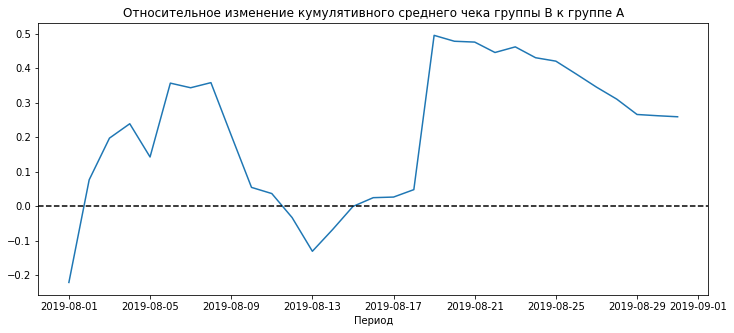

In [117]:
# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Период')
plt.show()

В группах наверняка есть выбросы и крупные заказы, т.к. график различия между сегментами резко скачет.

##### Построим график кумулятивной конверсии по группам. 

In [118]:
# Посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


In [119]:
# отделим данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [120]:
# по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [121]:
#cumulativeData['conversion'].describe()

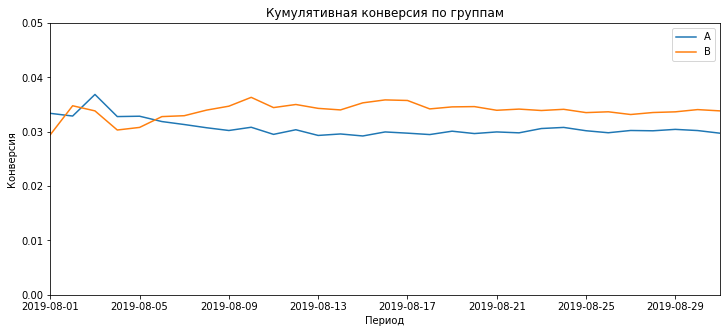

In [122]:
plt.figure(figsize=(12, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Конверсия')
plt.xlabel('Период')
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05]) 
plt.show()

В начале теста сегмент А имел большую конверсию, но постепенно сегмент В выровнялся и зафиксировался примерно у одного значения, больше значения сегмента А.

##### Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

In [123]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head(5)

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


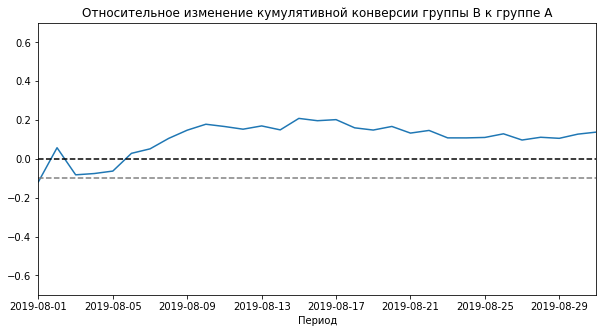

In [124]:
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Период')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.7, 0.7]) 
plt.show()

Почти с самого начала группа B лидирует по конверсии: на протяжении почти всего теста она стабильно больше конверсии группы А.

##### Построим точечный график количества заказов по пользователям.

In [125]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1)\
    .groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']
ordersByUsers.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


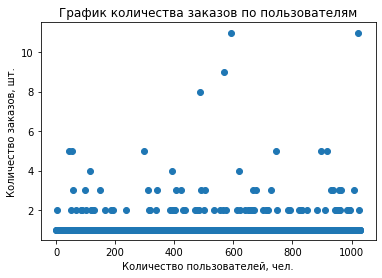

In [126]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов, шт.')
plt.xlabel('Количество пользователей, чел.')
plt.show()

Большинство пользователей совершали только один заказ, но и пользователей с 2-3 заказами тоже не мало.

##### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя, чтобы выбрать границу для определения аномальных пользователей.

In [127]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершают больше двух заказов и не более 1% - больше четырех. Тех кто совершает больше 2-ух заказов примем за аномальных пользователей.

##### Построим точечный график стоимостей заказов.

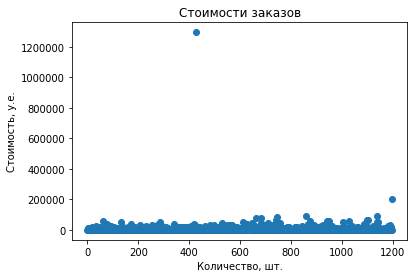

In [128]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимости заказов')
plt.ylabel('Стоимость, у.е.')
plt.xlabel('Количество, шт.')
plt.show()

Дорогих заказов не много, но один из них более 1,2 млн., что сильно искажает действительность.

##### Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [129]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Примем за аномальные заказы дороже 28тыс.

##### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [130]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [131]:
# Общее количество пользователей в каждой группе по дням;
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [132]:
# Посчитаем кумулятивное количество пользователей в каждой группе
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [133]:
# Количество покупателей и их количество покупок по группам

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [134]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [135]:
# Укажем число совершённых заказов для пользователей, которые заказывали хотя бы 1 раз 
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [136]:
# Сохраним переменные sampleA и sampleB, в которых пользователям будет соответствовать
# количество заказов. Тем, кто ничего не заказал, будут соответствовать нули
sampleA = (
    pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
    len(ordersByUsersA['orders'])), name='orders')],axis=0))

sampleB = (
    pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() -
    len(ordersByUsersB['orders'])), name='orders')],axis=0)) 

Сформулируем нулевую гипотезу: "средняя конверсия в группе A равна средней конверсии в группе B".
Альтернативная гипотеза: "средние конверсии в группе A и B отличаются".

In [137]:
# Посчитаем статистическую значимость различия в конверсии между группами
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))
# Выведем относительный прирост конверсии группы B
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.017
0.138


По «сырым» данным:
p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Средние конверсии в группе A и B отличаются. Относительный прирост конверсии группы В составил 13,8%.

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сформулируем нулевую гипотезу: "средний чек в группе A равен среднему чеку в группе B".
Альтернативная гипотеза: "средние чеки в группе A и B отличаются".

In [138]:
# Рассчитаем статистическую значимость различий в среднем чеке между группами
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
# Относительные различия в среднем чеке между группами
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


P-value значительно больше 0.05. Значит, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Однако, относительное различие среднего чека между сегментами 25,9%.

##### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Нулевая гипотеза: "средняя конверсия в группе A равна средней конверсии в группе B".
Альтернативная гипотеза: "средние конверсии в группе A и B отличаются".

За аномальных пользователей мы приняли тех, кто совершил от 3 заказов или совершил заказ дороже 28000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [139]:
# Узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


Всего 74 аномальных пользователей.

In [140]:
# Посчитаем статистическую значимость различий в конверсии групп по очищенным данным
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
# Применим статистический критерий Манна-Уитни к полученным выборкам
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.013
0.173


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В лучше сегмента А на 17,3%.

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза: "средний чек в группе A равен среднему чеку в группе B".
Альтернативная гипотеза: "средние чеки в группе A и B отличаются".

In [141]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative='two-sided')[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.738
-0.020


P-value практически не изменился и значит статистически значимого различия среднего чека между группами так и не появилось. Но после удаления выбросов разница между сегментами сократилась до 2%.

## Вывод <a name="sixth-bullet"></a>

В результате приоретизации гипотез мы получили пять наиболее приоритетных гипотез:
* Запустить акцию, дающую скидку на товар в день рождения 
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
В результате применения способа приоритезации ICE, лучшей стала гипотеза "Запустить акцию, дающую скидку на товар в день рождения", а при использовании RICE - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Такие изменения произошли из-за показателя Reach, который у гипотезы "Запустить акцию, дающую скидку на товар в день рождения" всего 1, т.к. эти измения повлияют на очень ограниченный круг покупателей,  а у "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" он самый большой - 10, т.к. затронет всех. 


При проведении А/В-тестирования, выручка в обоих группах равномерно увеличивается примерно до середины месяца. Затем график выручки группы (B) резко растет, в связи с тем, что в группу В попали крупные заказы. 
Почти с самого начала группа B лидирует по конверсии: на протяжении почти всего теста она стабильно больше конверсии группы А.
Большинство пользователей совершали 1-2 заказа за период. Не более 5% пользователей совершают больше двух заказов и не более 1% - больше четырех. Выручка с одного заказа в большинстве случаев не превышает 28000 у.е.
Не более 5% заказов дороже 28000 у.е. и не более 1% дороже 58233 у.е. Заказы дороже 28000у.е. и пользователи совершившие больше двух заказов были приняты за аномальные, чтобы проверить гипотезы без учета влияния выбросов.


В результате, мы выяснили, что есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Сегмент В стабильно имеет бОльшую конверсию, чем сегмент А на 17,3%.
Статистически значимого различия по среднему чеку между группами нет ни по сырым данным, ни после фильтрации. После удаления выбросов разница между сегментами сократилась до 2%. По сырым данным различие было 25,9% в пользу группы В.



На основании проведенного теста можно зафиксировать победу группы В и остановить тест, т.к. при незначительных изменениях в среднем чеке (в очищенных данных), конверсия сильно выросла.